### Dataset Reference - Kaggle

https://www.kaggle.com/code/ibtesama/getting-started-with-a-movie-recommendation-system/input

In [ ]:
# Install the wordcloud library
!pip install wordcloud

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [ ]:
credits_df = pd.read_csv("/content/credits.csv")
movies_df = pd.read_csv("/content/movies_metadata.csv")
ratings_df = pd.read_csv("/content/ratings_small.csv")
keywords_df = pd.read_csv("/content/keywords.csv")


<ipython-input-2-76705fae2d28>:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv("/content/movies_metadata.csv")


In [ ]:
print(movies_df.columns, "\n")
print(ratings_df.columns, "\n")
print(credits_df.columns, "\n")
print(keywords_df.columns, "\n")
print("Type of movies_df['id']:", movies_df['id'].dtype)
print("Type of credits_df['id']:", credits_df['id'].dtype)
print("Type of ratings_df['movieId']:", ratings_df['movieId'].dtype)
print("Type of keywords_df['id']:", keywords_df['id'].dtype)

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object') 

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object') 

Index(['cast', 'crew', 'id'], dtype='object') 

Index(['id', 'keywords'], dtype='object') 

Type of movies_df['id']: object
Type of credits_df['id']: int64
Type of ratings_df['movieId']: int64
Type of keywords_df['id']: int64


### key 'id' has different datatypes (object and int64) in both csvs. Convert the id to type string for consistency

In [ ]:
movies_df['id'] = movies_df['id'].astype(str)
credits_df['id'] = credits_df['id'].astype(str)
ratings_df['movieId'] = ratings_df['movieId'].astype(str)
keywords_df['id'] = keywords_df['id'].astype(str)

In [ ]:
movies_df = movies_df.merge(credits_df, on='id')
movies_df.shape

(45538, 26)

In [ ]:
# to view all columns in the dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
movies_df.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


In [ ]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45538 entries, 0 to 45537
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45538 non-null  object 
 1   belongs_to_collection  4500 non-null   object 
 2   budget                 45538 non-null  object 
 3   genres                 45538 non-null  object 
 4   homepage               7792 non-null   object 
 5   id                     45538 non-null  object 
 6   imdb_id                45521 non-null  object 
 7   original_language      45527 non-null  object 
 8   original_title         45538 non-null  object 
 9   overview               44584 non-null  object 
 10  popularity             45535 non-null  object 
 11  poster_path            45152 non-null  object 
 12  production_companies   45535 non-null  object 
 13  production_countries   45535 non-null  object 
 14  release_date           45451 non-null  object 
 15  re

In [ ]:
def parse_genres(genre_string):
    if pd.isnull(genre_string):
        return []
    try:
        return [g['name'] for g in ast.literal_eval(genre_string)]
    except:
        return []


In [ ]:
movies_df['genres_values'] = movies_df['genres'].apply(parse_genres)
# genre_df = movies_df.explode('genres_values')
# genre_df.head()

In [ ]:
movies_df.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,genres_values
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[Animation, Comedy, Family]"
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[Adventure, Fantasy, Family]"
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[Romance, Comedy]"
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[Comedy, Drama, Romance]"
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",[Comedy]


<ipython-input-14-10af91bec0a6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


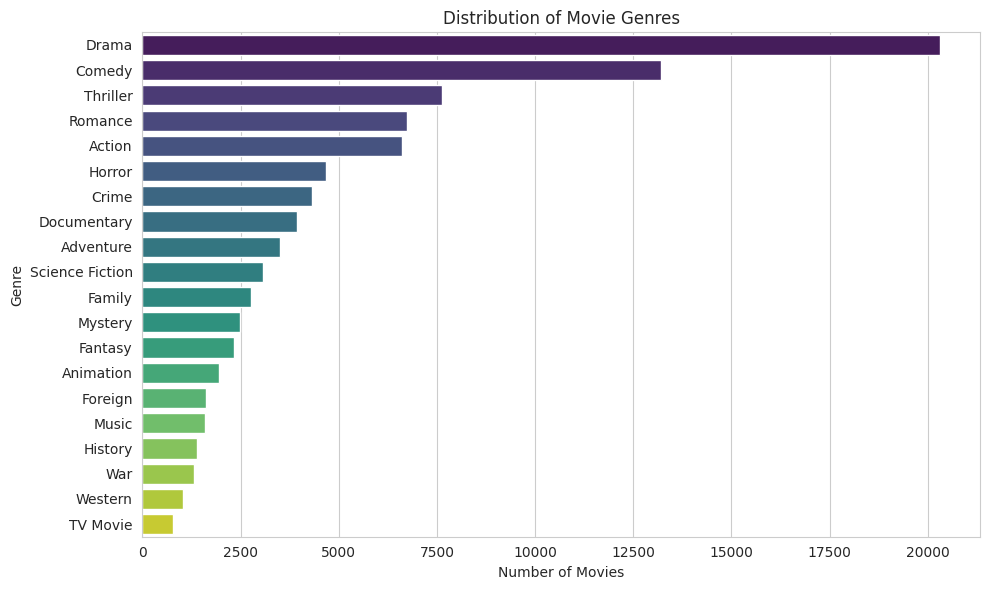

In [ ]:
genre_counts = genre_df['genres_values'].value_counts()


plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create bar plot
sns.barplot(
    x=genre_counts.values,
    y=genre_counts.index,
    palette='viridis'
)

# Customize the plot
plt.title('Distribution of Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')

# Adjust layout
plt.tight_layout()
plt.show()

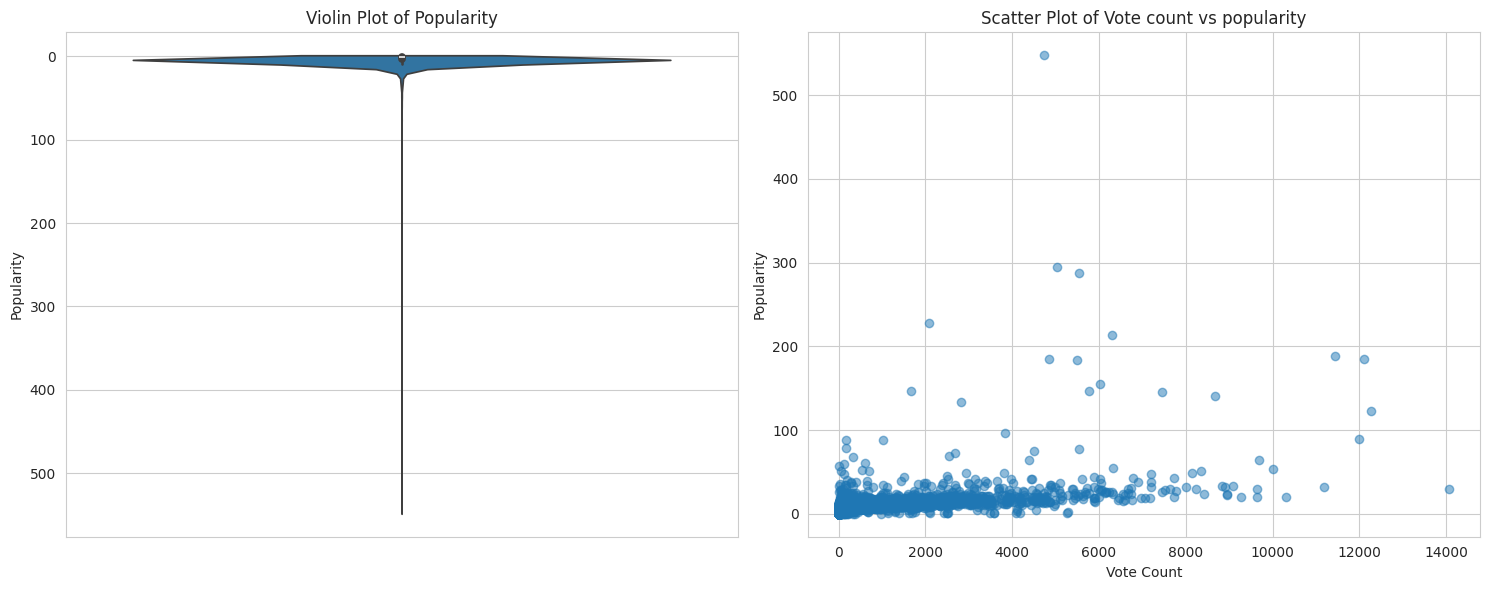

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Violin plot
sns.violinplot(y=movies_df['popularity'], ax=ax1)
ax1.set_title('Violin Plot of Popularity')
ax1.set_ylabel('Popularity')

# sns.scatterplot(x=movies_df['popularity'])
ax2.scatter(movies_df['vote_count'], movies_df['popularity'], alpha=0.5)
ax2.set_title('Scatter Plot of Vote count vs popularity')
ax2.set_xlabel('Vote Count')
ax2.set_ylabel('Popularity')

plt.tight_layout()
plt.show()

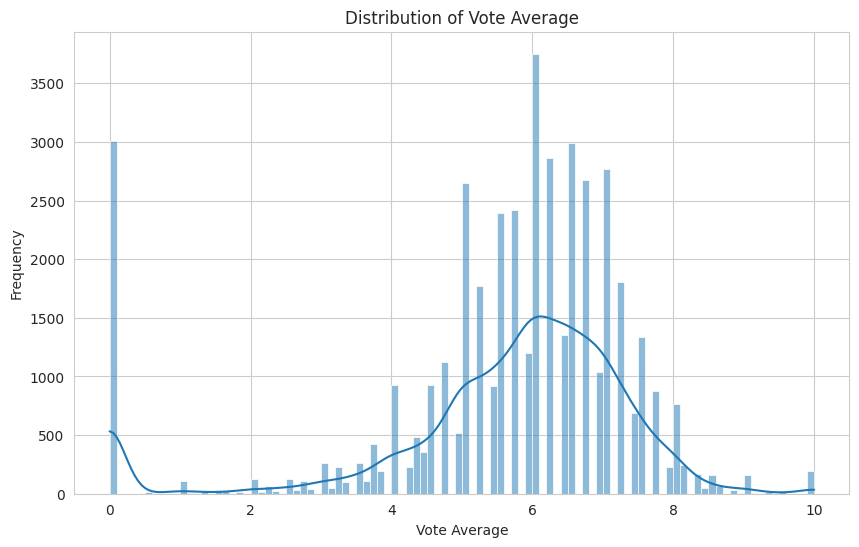

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['vote_average'], kde=True)
plt.title('Distribution of Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.show()

### To identify genres with the highest average ratings. You can choose a value for 'N' (e.g., top 10).

<ipython-input-17-56273faeaf8b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


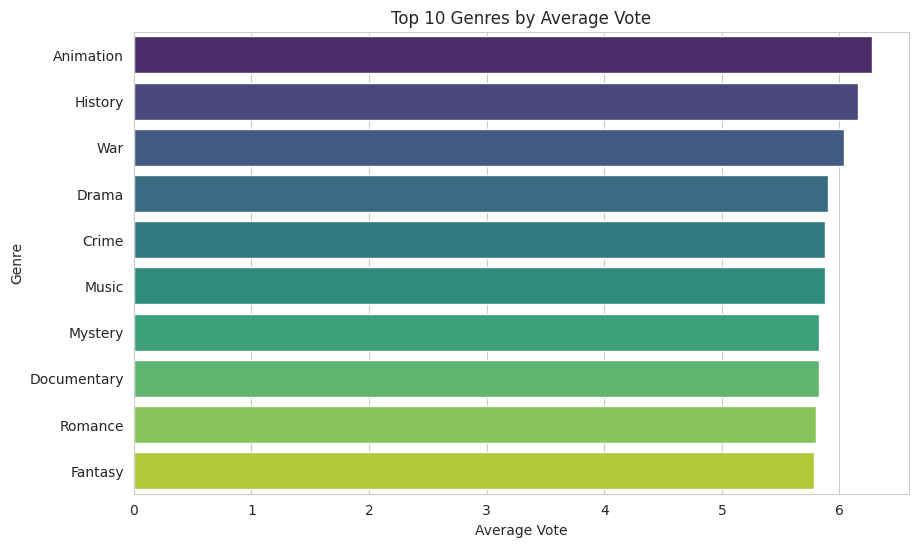

In [ ]:
# Number of top genres to display
N = 10

# Group by genre and calculate average vote
genre_avg_vote = genre_df.groupby('genres_values')['vote_average'].mean().sort_values(ascending=False)

# Select the top N genres
top_genres = genre_avg_vote[:N]

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title(f'Top {N} Genres by Average Vote')
plt.xlabel('Average Vote')
plt.ylabel('Genre')
plt.show()

<ipython-input-18-8c27adfe2fef>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_genres.values, y=bottom_genres.index, palette='viridis')


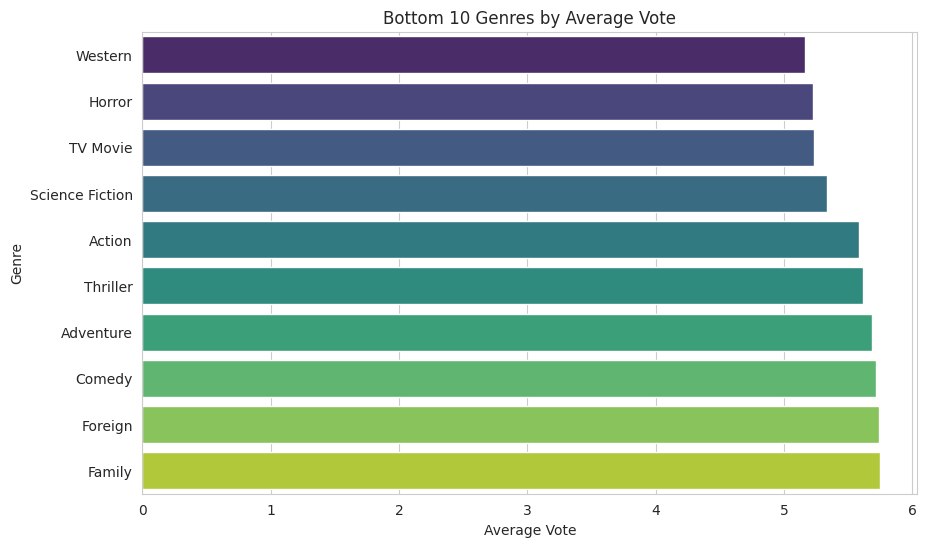

In [ ]:
# Number of bottom genres to display
N = 10

# Group by genre and calculate average vote
genre_avg_vote = genre_df.groupby('genres_values')['vote_average'].mean().sort_values(ascending=True)  # Sort in ascending order

# Select the bottom N genres
bottom_genres = genre_avg_vote[:N]

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_genres.values, y=bottom_genres.index, palette='viridis')
plt.title(f'Bottom {N} Genres by Average Vote')
plt.xlabel('Average Vote')
plt.ylabel('Genre')
plt.show()

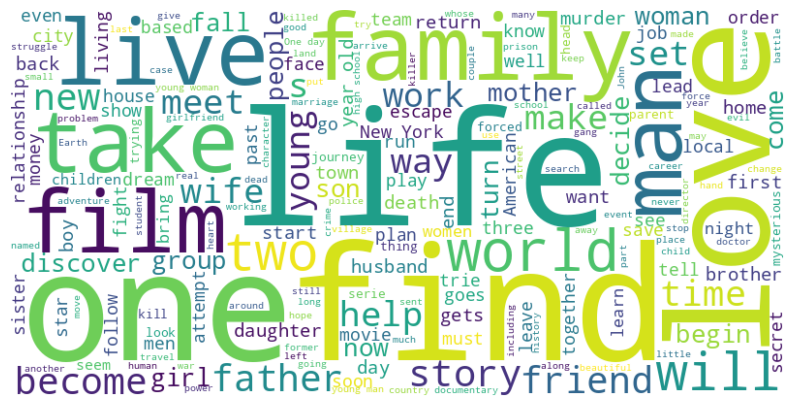

In [ ]:
from wordcloud import WordCloud, STOPWORDS

# Combine all movie overviews into a single string
text = ' '.join(movies_df['overview'].dropna())

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)

# Display the generated image
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
ratings_df.head(5)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
movies_df.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,genres_values
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[Animation, Comedy, Family]"
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[Adventure, Fantasy, Family]"
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[Romance, Comedy]"
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[Comedy, Drama, Romance]"
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",[Comedy]


## Distribution of Ratings

This plot will shows how ratings are distributed in ratings_df dataset. Understanding the rating distribution is crucial as it gives insights into user preferences and the overall rating behavior.

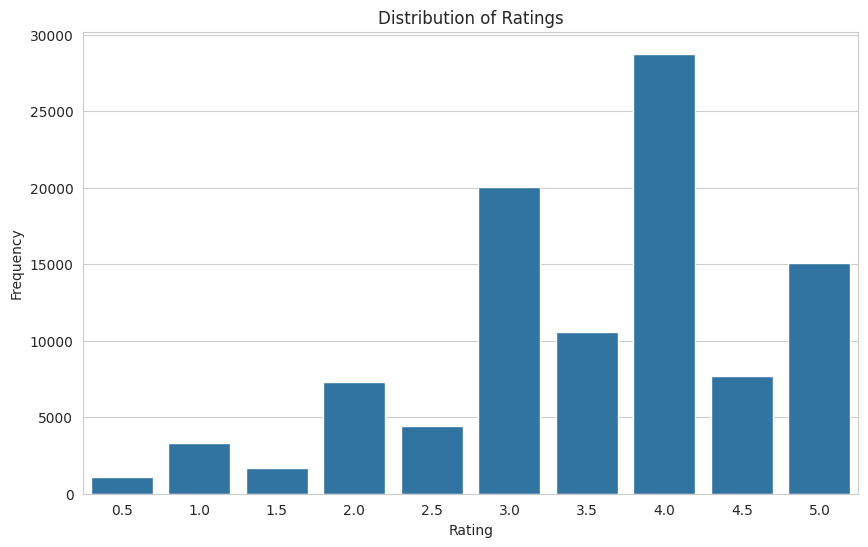

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=ratings_df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

## Number of Ratings per User and Movie:


These plots reveal the distribution of the number of ratings given by each user and received by each movie. This information helps you identify active users and popular movies, which can be important factors in building a recommender system.

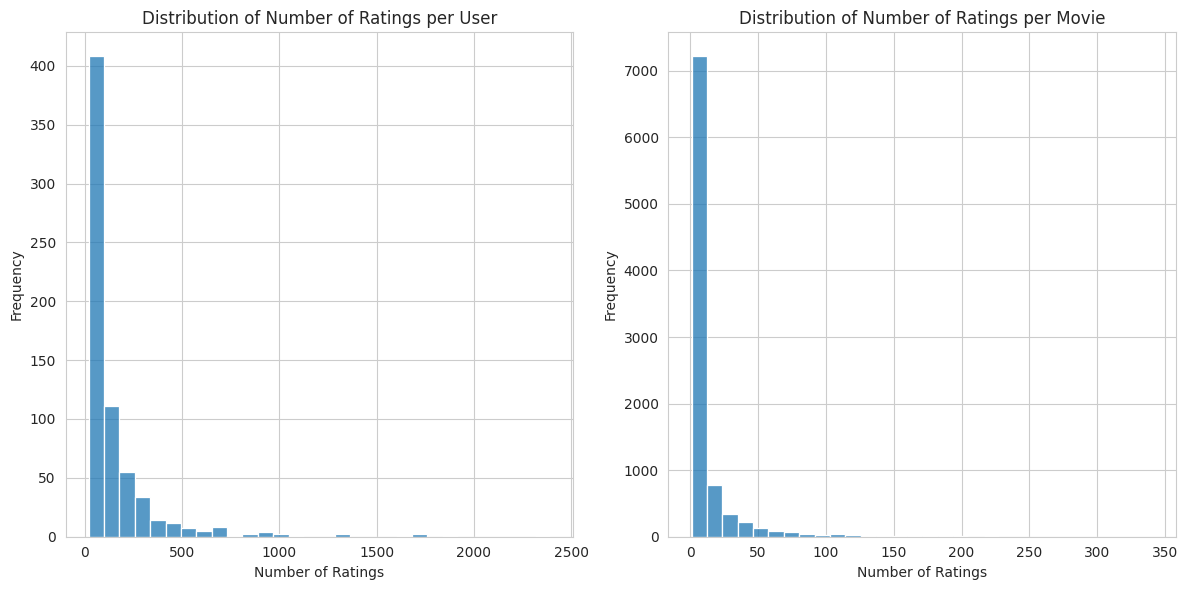

In [ ]:
user_ratings_count = ratings_df.groupby('userId')['rating'].count()
movie_ratings_count = ratings_df.groupby('movieId')['rating'].count()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(user_ratings_count, bins=30)
plt.title('Distribution of Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(movie_ratings_count, bins=30)
plt.title('Distribution of Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# Convert 'release_date' to datetime objects
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')

# Extract the release year
movies_df['release_year'] = movies_df['release_date'].dt.year

# Group by release year and sum the vote counts
yearly_votes = movies_df.groupby('release_year')['vote_count'].sum()

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_votes.index, y=yearly_votes.values)
plt.title('Release Year vs. Total Votes')
plt.xlabel('Release Year')
plt.ylabel('Total Number of Votes')
plt.show()

In [ ]:
movies_df.isnull().sum().sort_values(ascending=False)

In [ ]:
movies_df.dropna(subset=['title'], inplace=True)

In [ ]:
movies_df['id'].duplicated().sum()

In [ ]:
movies_df.drop_duplicates(subset=['id'], inplace=True)

In [ ]:
movies_df['vote_count'].fillna(0, inplace=True)
movies_df['vote_average'].fillna(0, inplace=True)

In [ ]:
movies_df['budget'] = movies_df['budget'].astype(float)

In [ ]:
numeric_cols = movies_df.select_dtypes(include=['float64'])
correlation_matrix = numeric_cols.corr(method="spearman")

# Print the correlation matrix
print(correlation_matrix)

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Content Based Filtering
They suggest similar items based on a particular item. This system uses item metadata, such as genre, director, description, actors, etc. for movies, to make these recommendations. The general idea behind these recommender systems is that if a person liked a particular item, he or she will also like an item that is similar to it.


In [ ]:
genre_df['overview'].head(5)

,overview
0,"Led by Woody, Andy's toys live happily in his ..."
0,"Led by Woody, Andy's toys live happily in his ..."
0,"Led by Woody, Andy's toys live happily in his ..."
1,When siblings Judy and Peter discover an encha...
1,When siblings Judy and Peter discover an encha...


In [ ]:
len(genre_df['overview'])

93724

Now we'll compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each overview.

TF-IDF is the relative frequency of a word in a document and is given as (term instances/total instances). Inverse Document Frequency is the relative count of documents containing the term is given as log(number of documents/documents with term) The overall importance of each word to the documents in which they appear is equal to TF * IDF

This will give you a matrix where each column represents a word in the overview vocabulary (all the words that appear in at least one document) and each row represents a movie, as before.This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
genre_df['overview'] = genre_df['overview'].fillna('')

# Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(genre_df['overview'])

tfidf_matrix.shape

(93724, 75827)

We see that over 20,000 different words were used to describe the 4800 movies in our dataset.

With this matrix in hand, we can now compute a similarity score. There are several candidates for this; such as the euclidean, the Pearson and the cosine similarity scores.

Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's linear_kernel() instead of cosine_similarities() since it is faster.

In [ ]:
movies_df = movies_df.drop('genres_values', axis=1)

In [ ]:
movies_df = movies_df.merge(keywords_df, on='id')

In [ ]:
movies_df.shape

(46628, 27)

In [ ]:
from ast import literal_eval

features = ['cast', 'crew', 'genres', 'production_companies', 'keywords']
for feature in features:
    movies_df[feature] = movies_df[feature].apply(lambda x: [] if pd.isnull(x) else literal_eval(x))

In [ ]:
movies_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': 'Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [ ]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [ ]:
# Returns the list top 3 elements or entire list; whichever is less.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]

        return names

    # Return empty list in case of missing/malformed data
    return []

In [ ]:
# Define new director, cast, genres and keywords features that are in a suitable form.
movies_df['director'] = movies_df['crew'].apply(get_director)

features = ['cast', 'genres', 'production_companies', 'keywords']

for feature in features:
    movies_df[feature] = movies_df[feature].apply(get_list)

In [ ]:
movies_df[['title', 'cast', 'director', 'genres', 'production_companies', 'keywords']].head(5)

,title,cast,director,genres,production_companies,keywords
0,Toy Story,"[Tom Hanks, Tim Allen, Don Rickles]",John Lasseter,"[Animation, Comedy, Family]",[Pixar Animation Studios],"[jealousy, toy, boy]"
1,Jumanji,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",Joe Johnston,"[Adventure, Fantasy, Family]","[TriStar Pictures, Teitler Film, Interscope Co...","[board game, disappearance, based on children'..."
2,Grumpier Old Men,"[Walter Matthau, Jack Lemmon, Ann-Margret]",Howard Deutch,"[Romance, Comedy]","[Warner Bros., Lancaster Gate]","[fishing, best friend, duringcreditsstinger]"
3,Waiting to Exhale,"[Whitney Houston, Angela Bassett, Loretta Devine]",Forest Whitaker,"[Comedy, Drama, Romance]",[Twentieth Century Fox Film Corporation],"[based on novel, interracial relationship, sin..."
4,Father of the Bride Part II,"[Steve Martin, Diane Keaton, Martin Short]",Charles Shyer,[Comedy],"[Sandollar Productions, Touchstone Pictures]","[baby, midlife crisis, confidence]"


In [ ]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [ ]:
# Apply clean_data function to your features.
features = ['cast', 'genres', 'production_companies', 'keywords', 'director']

for feature in features:
    movies_df[feature] = movies_df[feature].apply(clean_data)

In [ ]:
movies_df[['title', 'cast', 'director', 'genres', 'production_companies', 'keywords']].head()

,title,cast,director,genres,production_companies,keywords
0,Toy Story,"[tomhanks, timallen, donrickles]",johnlasseter,"[animation, comedy, family]",[pixaranimationstudios],"[jealousy, toy, boy]"
1,Jumanji,"[robinwilliams, jonathanhyde, kirstendunst]",joejohnston,"[adventure, fantasy, family]","[tristarpictures, teitlerfilm, interscopecommu...","[boardgame, disappearance, basedonchildren'sbook]"
2,Grumpier Old Men,"[waltermatthau, jacklemmon, ann-margret]",howarddeutch,"[romance, comedy]","[warnerbros., lancastergate]","[fishing, bestfriend, duringcreditsstinger]"
3,Waiting to Exhale,"[whitneyhouston, angelabassett, lorettadevine]",forestwhitaker,"[comedy, drama, romance]",[twentiethcenturyfoxfilmcorporation],"[basedonnovel, interracialrelationship, single..."
4,Father of the Bride Part II,"[stevemartin, dianekeaton, martinshort]",charlesshyer,[comedy],"[sandollarproductions, touchstonepictures]","[baby, midlifecrisis, confidence]"


In [ ]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres']) + ' ' + ' '.join(x['production_companies'])

movies_df['soup'] = movies_df.apply(create_soup, axis=1)

In [ ]:
movies_df['soup'].head()

,soup
0,jealousy toy boy tomhanks timallen donrickles ...
1,boardgame disappearance basedonchildren'sbook ...
2,fishing bestfriend duringcreditsstinger walter...
3,basedonnovel interracialrelationship singlemot...
4,baby midlifecrisis confidence stevemartin dian...


In [ ]:
list(movies_df['soup'])[0]

'jealousy toy boy tomhanks timallen donrickles johnlasseter animation comedy family pixaranimationstudios'

In [ ]:
movies_df.shape

(46628, 29)

In [ ]:
# remove duplicate ids from movie_df
movies_df = movies_df.drop_duplicates(subset='id', keep='first')

# remove random rows from movie_df
movies_df = movies_df.sample(n=15000, random_state=42)

# reset index
movies_df = movies_df.reset_index(drop=True)

In [ ]:
movies_df.shape

(15000, 29)

In [ ]:
movies_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,keywords,director,soup
0,False,NaN,3000000,[documentary],http://www.magpictures.com/freakonomics/,43942,tt1152822,en,Freakonomics,Some of the world's most innovative documentar...,2.444847,/kksphV9dA6a5xbLhPCI2XtMMCV3.jpg,"[chadtroutwinefilms, greenfilmcompany, humanwo...","[{'iso_3166_1': 'US', 'name': 'United States o...",2010-10-01,103735.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Things you always thought you knew but didn't,Freakonomics,False,6.7,36.0,"[zoesloane, jadeviggiano, amancayaaguilar]","[{'credit_id': '52fe466cc3a36847f80fe50f', 'de...","[femalenudity, corruption, cheating]",heidiewing,femalenudity corruption cheating zoesloane jad...
1,False,NaN,0,"[comedy, romance]",NaN,30139,tt0490196,en,Phat Girlz,Two plus-sized ladies meet the men of their dr...,1.19271,/waI45hZBwZJT9UB0ff8GgjID0F.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2006-01-01,0.0,99.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Phat Girlz,False,3.7,10.0,"[mo'nique, jimmyjean-louis, godfrey]","[{'credit_id': '52fe44009251416c910019ef', 'de...",[womandirector],nnegestlikké,womandirector mo'nique jimmyjean-louis godfrey...
2,False,NaN,0,[drama],NaN,85389,tt1522189,pt,Natimorto,A talent agent summons a young singer to Sao P...,0.009693,/1jouDGgqXdPUVAnluso4tSWE1YM.jpg,[],"[{'iso_3166_1': 'BR', 'name': 'Brazil'}]",2011-04-29,0.0,92.0,"[{'iso_639_1': 'pt', 'name': 'Português'}]",Released,NaN,Natimorto,False,0.0,0.0,"[lourençomutarelli, simonespoladore, bettygofman]","[{'credit_id': '52fe493a9251416c910a6b6d', 'de...",[],paulomachline,lourençomutarelli simonespoladore bettygofman...
3,False,NaN,0,"[drama, crime]",NaN,55316,tt0062092,fr,Le pacha,Six months before his retirement from the crim...,1.049774,/yP9FFIeR0gDlrqx7VKpF7qitpTz.jpg,"[rizzolifilms, sociéténouvelledesétablissement...","[{'iso_3166_1': 'IT', 'name': 'Italy'}, {'iso_...",1968-03-14,0.0,90.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,Pasha,False,6.7,11.0,"[jeangabin, danycarrel, andrépousse]","[{'credit_id': '52fe48c6c3a36847f8178add', 'de...",[],georgeslautner,jeangabin danycarrel andrépousse georgeslautn...
4,False,NaN,0,"[horror, comedy]",http://www.range15.com,402976,tt4687276,en,Range 15,A group of veterans wake up after a night of p...,1.650286,/olTUdNgOVapsaOJhbiCEwUimDGW.jpg,[],[],2016-06-15,0.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Range 15,False,4.8,20.0,"[seanastin, keithdavid, dannytrejo]","[{'credit_id': '57683cfd9251416c3b00018d', 'de...",[],rosspatterson,seanastin keithdavid dannytrejo rosspatterson...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(movies_df['soup'])

In [ ]:
count_matrix.shape

(15000, 45918)

In [ ]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [ ]:
movies_df = movies_df.reset_index()
indices = pd.Series(movies_df.index, index=movies_df['title'])

In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim):
    '''
    Function that takes in movie title as input and outputs most similar movies
    '''
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return movies_df['title'].iloc[movie_indices]

In [ ]:
list(movies_df['title'])[:100]

['Freakonomics',
 'Phat Girlz',
 'Natimorto',
 'Pasha',
 'Range 15',
 'Honor Among Lovers',
 'Monkey Business',
 'B-Movie: Lust & Sound in West-Berlin',
 'Il castello',
 'Species: The Awakening',
 'Rocky III',
 'The Last Survivors',
 'Serious Moonlight',
 'Equalizer 2000',
 'Our Paradise',
 'Systemfehler - Wenn Inge tanzt',
 'New York Doll',
 'Angel Dog',
 'Devasuram',
 'United Passions',
 'Macon County Line',
 'Echoes of the Rainbow',
 'The Garden',
 'Niente paura',
 'Blood on the Sun',
 'Call Me',
 'NY77: The Coolest Year in Hell',
 'Sideways',
 'Pani z przedszkola',
 'Quiet City',
 'Your Friends & Neighbors',
 'Mistress',
 'The Miracle of the Bells',
 'Cheating Death, Stealing Life: The Eddie Guerrero Story',
 'Tangled',
 'Beau Geste',
 "New York in the 50's",
 'Point Blank',
 'The Girl Said No',
 'The Bourne Identity',
 'The Boy with Green Hair',
 'Facing Fear',
 'The Weather Man',
 'The Farewell Party',
 'Genghis Khan',
 'The Outlaw and His Wife',
 'Wrong Turn 2: Dead End',
 'Morp

In [ ]:
get_recommendations('Rocky III', cosine_sim)

,title
9331,Rocky II
3028,Rocky V
11624,F.I.S.T.
11178,Reach Me
5902,Raging Bull
9901,Downhill Racer
13107,Sundome
644,Fat City
5468,The Party at Kitty and Stud's
5461,Hustling


In [ ]:
get_recommendations('Israeli Intelligence', cosine_sim)

,title
14329,I Accidentally Domed Your Son
5275,The Fourth Annual 'On Cinema' Oscar Special
8538,The Ransom of Red Chief
10796,Kung Phooey
580,The Great St. Trinian's Train Robbery
823,The Green Hornet
3032,Ninjas vs. Zombies
3851,Khaleja
3864,Loafing and Camouflage: I-4
8766,Honky Tonk Freeway


In [ ]:
get_recommendations('Toy Story', cosine_sim)

,title
5764,Superstar Goofy
4062,Toy Story of Terror!
480,Partysaurus Rex
912,Tin Toy
7002,Cars 2
4354,Uncle P
13926,VeggieTales: Josh and the Big Wall
5186,Anina
2252,Dexter's Laboratory: Ego Trip
1631,Creature Comforts


### Collaborative Filtering - Single Value Decomposition (SVD)

In [ ]:
!pip install surprise

from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import train_test_split, cross_validate
from surprise.model_selection.search import GridSearchCV

In [ ]:
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], Reader())
trainset, testset = train_test_split(data, test_size=.15, random_state=42, shuffle=True)

In [ ]:
param_grid = {'n_epochs': [100, 200, 300], 'lr_all': [0.001, 0.002, 0.005], 'reg_all': [0.02, 0.1, 0.05, 0.2]}

grid_search = GridSearchCV(SVD, param_grid=param_grid, measures=['rmse', 'mae'], cv=5, joblib_verbose=True)
grid_search.fit(data)

In [ ]:
print(grid_search.best_score['rmse'])
print(grid_search.best_params['rmse'])

In [ ]:
best_model = grid_search.best_estimator['rmse']
best_model.fit(trainset)

# Evaluate the model on the test set
predictions = best_model.test(testset)
print("mse: ", accuracy.rmse(predictions))
print("mae: ", accuracy.mae(predictions))

### Bayesian Inference

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Load MovieLens data
movies_path = 'movies_metadata.csv'
ratings_path = 'ratings_small.csv'

movies = pd.read_csv(movies_path)
ratings = pd.read_csv(ratings_path)

# Create user-item interaction matrix
user_item_matrix = ratings.pivot(index='userId', columns='movieId', values='rating').fillna(0)

# Split the user-item matrix into train, validation, and test sets
train_data, temp_data = train_test_split(user_item_matrix, test_size=0.2, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Convert dataframes to numpy arrays
train_matrix = train_data.values
val_matrix = val_data.values
test_matrix = test_data.values

In [ ]:
# Matrix factorization function with regularization
def matrix_factorization(train_matrix, num_latent_factors=20, learning_rate=0.01, lambda_reg=0.1, epochs=100):
    num_users, num_items = train_matrix.shape
    # Initialize user and item latent factor matrices with random values
    user_factors = np.random.normal(scale=0.1, size=(num_users, num_latent_factors))
    item_factors = np.random.normal(scale=0.1, size=(num_items, num_latent_factors))

    # Training the model using Stochastic Gradient Descent (SGD)
    for epoch in range(epochs):
        for i in range(num_users):
            for j in range(num_items):
                if train_matrix[i, j] > 0:  # Only update the factors for rated movies
                    error = train_matrix[i, j] - np.dot(user_factors[i, :], item_factors[j, :].T)
                    # Update latent factors with regularization
                    user_factors[i, :] += learning_rate * (error * item_factors[j, :] - lambda_reg * user_factors[i, :])
                    item_factors[j, :] += learning_rate * (error * user_factors[i, :] - lambda_reg * item_factors[j, :])

        # Compute the cost (mean squared error + regularization)
        cost = 0
        for i in range(num_users):
            for j in range(num_items):
                if train_matrix[i, j] > 0:
                    cost += (train_matrix[i, j] - np.dot(user_factors[i, :], item_factors[j, :].T))**2
                    cost += (lambda_reg / 2) * (np.sum(user_factors[i, :]**2) + np.sum(item_factors[j, :]**2))
        cost = cost / np.count_nonzero(train_matrix)
        print(f"Epoch {epoch + 1}/{epochs} - Cost: {cost:.4f}")

    return user_factors, item_factors

# Factorize the matrix using the function
user_factors, item_factors = matrix_factorization(train_matrix, num_latent_factors=200, learning_rate=0.01, lambda_reg=0.07, epochs=100)

# Function to predict ratings for a user
def predict_ratings(user_id, user_factors, item_factors):
    predicted_ratings = np.dot(user_factors[user_id, :], item_factors.T)
    return predicted_ratings

# Function to recommend movies using matrix factorization model
def recommend_movies(user_id, user_factors, item_factors, K=10):
    predicted_ratings = predict_ratings(user_id, user_factors, item_factors)

    # Sort movies based on predicted ratings (highest rating first)
    user_recommendations = np.argsort(predicted_ratings)[::-1]

    # Get the top K recommendations
    top_k_recommendations = user_recommendations[:K]

    return top_k_recommendations

def evaluate_accuracy(test_matrix, user_factors, item_factors):
    # Get predicted ratings for the entire matrix
    predicted_ratings = np.dot(user_factors, item_factors.T)

    # Get the rows and columns for non-zero entries in the test matrix
    non_zero_rows, non_zero_cols = np.nonzero(test_matrix)  # non-zero ratings in the test matrix

    # Extract true ratings for the non-zero entries
    true_ratings_non_zero = test_matrix[non_zero_rows, non_zero_cols]

    # Extract predicted ratings for the same non-zero entries
    predicted_ratings_non_zero = predicted_ratings[non_zero_rows, non_zero_cols]

    # Calculate MSE, MAE, RMSE only on non-zero ratings
    mse = mean_squared_error(true_ratings_non_zero, predicted_ratings_non_zero)
    mae = mean_absolute_error(true_ratings_non_zero, predicted_ratings_non_zero)
    rmse = np.sqrt(mse)

    return mse, mae, rmse

In [ ]:
# Run evaluation
mse, mae, rmse = evaluate_accuracy(test_matrix, user_factors, item_factors)
print(f"Test MSE: {mse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test RMSE: {rmse:.4f}")


### AutoEncoders

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [ ]:
# Load MovieLens m1-small dataset
movies_path = 'movies_metadata.csv'
ratings_path = 'ratings_small.csv'

movies = pd.read_csv(movies_path)
ratings = pd.read_csv(ratings_path)

# Create user-item interaction matrix
user_item_matrix = ratings.pivot(index='userId', columns='movieId', values='rating').fillna(0)

# Split the data into train, validation, and test sets
train_data, temp_data = train_test_split(user_item_matrix, test_size=0.2, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Convert dataframes to numpy arrays
train_matrix = train_data.values
val_matrix = val_data.values
test_matrix = test_data.values

# Define an autoencoder model
input_dim = train_matrix.shape[1]
encoding_dim = 64  # This can be adjusted depending on the level of compression needed

# Build the autoencoder model
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
history = autoencoder.fit(train_matrix, train_matrix, epochs=50, batch_size=256, shuffle=True, validation_data=(val_matrix, val_matrix))

In [ ]:
# Function to get movie recommendations using the autoencoder
def recommend_movies_autoencoder(user_id, model, train_data, K=10):
    # Predict the user ratings for all movies
    user_ratings = model.predict(train_data)

    # Sort movies based on predicted ratings
    user_recommendations = np.argsort(user_ratings[user_id, :])[::-1]  # Reverse order (highest rating first)

    # Get the top K recommendations
    top_k_recommendations = user_recommendations[:K]

    return top_k_recommendations

# Evaluate Precision@K and Recall@K for the autoencoder model
def evaluate_model_autoencoder(test_matrix, model, K):
    precision_scores = []
    recall_scores = []

    for user_id in range(test_matrix.shape[0]):
        # Get true ratings for this user in the test set
        true_ratings = test_matrix[user_id, :]
        relevant_movies = np.where(true_ratings > 0)[0]

        # Get recommendations from the model
        recommendations = recommend_movies_autoencoder(user_id, model, test_matrix, K)

        # Calculate precision and recall
        recommended_relevant = set(recommendations).intersection(set(relevant_movies))
        precision = len(recommended_relevant) / K
        recall = len(recommended_relevant) / len(relevant_movies) if len(relevant_movies) > 0 else 0

        precision_scores.append(precision)
        recall_scores.append(recall)

    avg_precision = sum(precision_scores) / len(precision_scores)
    avg_recall = sum(recall_scores) / len(recall_scores)

    return avg_precision, avg_recall

# Evaluate RMSE, MAE, Precision@K, Recall@K for different K values
def evaluate_accuracy(test_matrix, model):
    predicted_ratings = model.predict(test_matrix)
    mse = mean_squared_error(test_matrix, predicted_ratings)
    mae = mean_absolute_error(test_matrix, predicted_ratings)
    rmse = np.sqrt(mse)

    return mse, mae, rmse


In [ ]:
# Evaluate the model on the test set
mse, mae, rmse = evaluate_accuracy(test_matrix, autoencoder)
print(f"Test MSE: {mse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test RMSE: {rmse:.4f}")

# Evaluate Precision@K and Recall@K for different K values
k_values = [5]
precision_values = []
recall_values = []

for k in k_values:
    precision_at_k, recall_at_k = evaluate_model_autoencoder(test_matrix, autoencoder, K=k)
    precision_values.append(precision_at_k)
    recall_values.append(recall_at_k)
    print(f"Precision@K={k}: {precision_at_k}")
    print(f"Recall@K={k}: {recall_at_k}")

print(f"Average Precision: {np.average(precision_values)}")
print(f"Average Recall: {np.average(recall_values)}")